In [1]:
## Getting MNIST data 

from six.moves import urllib


from sklearn.decomposition import PCA
from scipy.io import loadmat


In [2]:
##Defining Input and target and normalizing the input

from matplotlib import pyplot as plt
import numpy as np
#inp= mnist.values()
#tar = mnist.values()
#inp = inp // 255.0

from tensorflow.keras.datasets import mnist

(inp_tr, tar_tr), (inp_va, tar_va) = mnist.load_data()
inp_tr= inp_tr/255.
inp_va= inp_va/255.
inp_tr = np.reshape(inp_tr,(-1,784))
inp_va = np.reshape(inp_va,(-1,784))



In [3]:
## Choose the first  n components of PCA result



n_components=50
pca=PCA(n_components=n_components)

# fit 
pca.fit(inp_tr)

# predict 

inp_tr_pca = pca.transform(inp_tr)
inp_va_pca = pca.transform(inp_va)

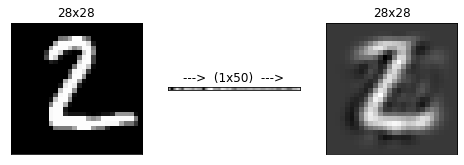

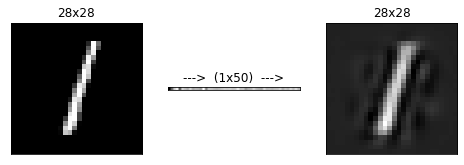

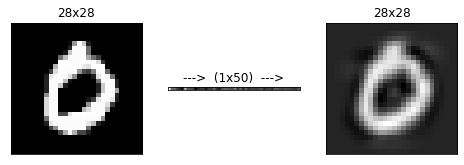

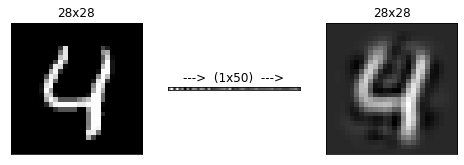

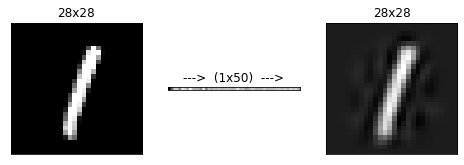

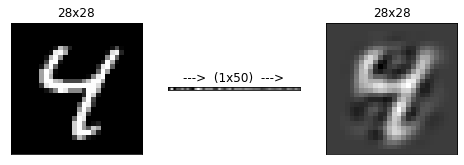

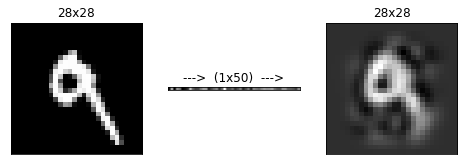

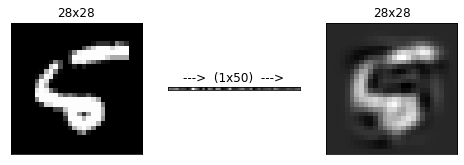

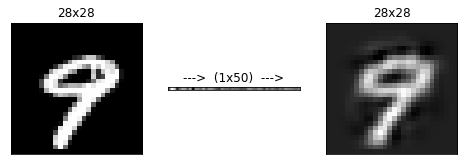

In [4]:
# show some examples of digits (left the original, right after PCA, middle n first components)

sx= int(np.sqrt(n_components))
sy= int(np.sqrt(n_components))
for n_pic in range(1,10):
    plt.figure(n_pic, figsize=(8,8))
    approximation = pca.inverse_transform(inp_va_pca[n_pic])
    fig = plt.figure(n_pic)
    plt.subplot(1, 3, 1)
    plt.imshow(inp_va[n_pic].reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 2)
    plt.imshow(inp_va_pca[n_pic].reshape((-1, n_components)),cmap='gray')
    plt.title('--->  (1x'+str(n_components)+')  --->')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 3, 3)
    plt.imshow(approximation.reshape(28,28),cmap='gray')
    plt.title('28x28')
    plt.xticks([])
    plt.yticks([])




plt.show()

In [5]:
from sklearn.cluster import KMeans

##Choose the number of clusters  in the Kmean method


K=10
# fit the n first components of pca  by Kmean 

kmeans = KMeans(n_clusters=K,max_iter=500, tol=0.00001).fit(inp_tr_pca)

# predict

Kmean_tr=kmeans.predict(inp_tr_pca)
Kmean_va=kmeans.predict(inp_va_pca)

<ipython-input-6-08f22a95dfbb>:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(n_tot/10,10,k1+1,title=str(int(tar_va[n_pic])) )


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

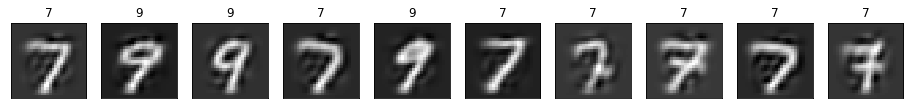

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
# show some examples of a cluster (e.g., n_cluster=1) of K cluster. 


n_cluster = 3

n_k=np.where(Kmean_va==n_cluster)[0]




## see some members of the cluster

n_tot=10

plt.gray()
fig = plt.figure( figsize=(16,7) )
for k1 in range(0,n_tot):
    n_pic=n_k[k1]
    plt.figure(k1)
    approximation = pca.inverse_transform(inp_va_pca[n_pic])
    ax = fig.add_subplot(n_tot/10,10,k1+1,title=str(int(tar_va[n_pic])) )
    plt.subplots_adjust(hspace = .4)
    ax.matshow(approximation.reshape((28,28)).astype(float))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()    
    

([<matplotlib.axis.XTick at 0x2c8cbcbe400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

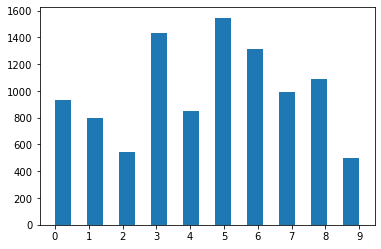

In [7]:
# the distribution on MNIST data (validation) 0
# i.e., number of samples in each cluster.
# from cluster 0 to N=K

plt.hist(Kmean_va,2*K-1)
plt.xticks(np.arange(K))

(10, 50)


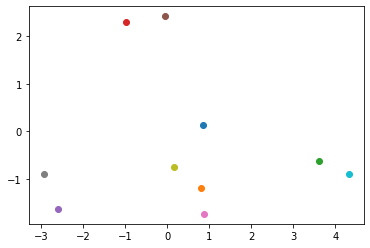

In [8]:
# show the center of the cluster in the two dimention plot (of the selected components):

#choose the two components of PCA
comp_x = 0
comp_y = 1




for k1 in range(K):
  plt.plot(kmeans.cluster_centers_[k1,comp_x],kmeans.cluster_centers_[k1,comp_y],'o')

print (np.shape(kmeans.cluster_centers_))